In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
from MLP import *
from gridSearch import *
from funct import *
#from gridSearch import *
import pandas as pd
import pickle

In [10]:
def MONK_dataset(nfile):

    tr_files=['monk_tests/monks-'+str(i+1)+'.train' for i in range(3)]
    te_files=['monk_tests/monks-'+str(i+1)+'.test' for i in range(3)]

    tr_data = pd.read_csv(tr_files[nfile-1],sep=' ',index_col=8).sample(frac=1)
    tr_data = tr_data.drop(columns = tr_data.columns[0])
    tr_data = tr_data.to_numpy()

    te_data = pd.read_csv(te_files[nfile-1],sep=' ',index_col=8)
    te_data = te_data.drop(columns = te_data.columns[0])
    te_data = te_data.to_numpy()

    return tr_data,te_data

In [23]:
def xy(data):
    x = data[:,1:]
    y = to_categorical(data[:,0])
    return x,y

params=[
        {
         'Nodes': [[6,5,2],[6,10,2],[6,15,2]],
         'f': ['tanh','relu'],
         "f_out":['softmax'],
         'learning_rate': [1e-02, 1e-03],
         'alpha': [5e-01, 9e-01],
         'lambda' : [0,1e-5]
        }
      ]

In [24]:
data,test=MONK_dataset(3)
best_config,best_error=k_fold_CV(data, params, k=4, n_init=2, max_epochs=300, tresh=.1,
bs=15, measure_interval=10,xy=xy)

testing 48 configurations 

testing configuration {'Nodes': [6, 5, 2], 'f': 'tanh', 'f_out': 'softmax', 'learning_rate': 0.01, 'alpha': 0.5, 'lambda': 0}, 0/48
initialization 0
validation: 0.546505376344086, train: 0.561996336996337
initialization 1
validation: 0.6362903225806451, train: 0.6666361416361416
best mean error for this config: 0.546505376344086 

testing configuration {'Nodes': [6, 5, 2], 'f': 'tanh', 'f_out': 'softmax', 'learning_rate': 0.01, 'alpha': 0.5, 'lambda': 1e-05}, 1/48
initialization 0
validation: 0.6534946236559139, train: 0.7463980463980464
initialization 1
validation: 0.7771505376344087, train: 0.7627899877899877
best mean error for this config: 0.6534946236559139 

testing configuration {'Nodes': [6, 5, 2], 'f': 'tanh', 'f_out': 'softmax', 'learning_rate': 0.01, 'alpha': 0.9, 'lambda': 0}, 2/48
initialization 0
validation: 0.761021505376344, train: 0.7710012210012209
initialization 1
validation: 0.6553763440860215, train: 0.745970695970696
best mean error for

In [16]:
n = MLP(  Nodes=[6,10,10,2], f='relu', f_out='softmax')

final error: 0.859504132231405


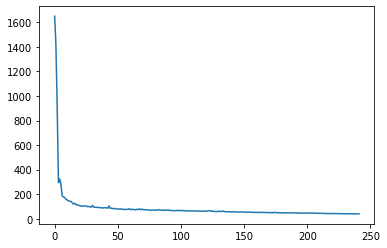

In [22]:
tx,ty=xy(data)
vx,vy=xy(test)
n.train(tx,ty, 3e-03,
  a = 9e-01,
  l = 1e-9,
  val_x=vx,val_y=vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 20,
  bs=20 )

plt.plot(n.loss_history)

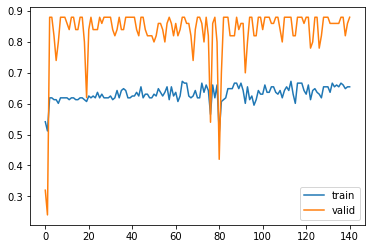

In [23]:
plt.plot(n.train_history,label = 'train')
plt.plot(n.valid_history,label = 'valid')
plt.legend()